In [1]:
## most up to date version of code that scans for forward and reverse binding sites
## imports the table of genes
import numpy as np
import pandas as pd
dna_sequences = pd.read_csv(input(), delimiter=',')
dna_sequences

gstd1.csv


,gene,upstream
0,gstd1,gagcccacttttataggggccggctgtggtcgccacaatgccggca...


In [5]:
## choses dictionary with pfm for code 
print('Input transcription factor name')
factor = input()
if factor.upper() == 'ATF4':
    profile = {'A': [210, 169, 639, 0, 19, 888, 2, 1, 40, 879, 888, 0, 414], 'C': [71, 117, 202, 0, 0, 0, 372, 0, 838, 21, 3, 266, 272], 'G': [442, 409, 127, 7, 1090, 0, 9, 1104, 16, 0, 1, 62, 101], 'T': [170, 213, 3, 981, 11, 25, 470, 4, 113, 3, 4, 714, 78]}
    ## make revcomp profile
elif factor.upper() == 'XBP1':
    profile = {'A': [4396, 3270, 1104, 974, 3699, 167, 7840, 9, 52, 0, 380, 8004, 230, 989], 'C': [558, 1017, 1191, 367, 3809, 7169, 17, 7356, 0, 16, 7264, 48, 2273, 6313], 'G': [801, 2413, 2669, 9168, 59, 222, 276, 2, 11353, 8, 47, 173, 3157, 1217], 'T': [2467, 1780, 3999, 2321, 247, 442, 118, 10, 10, 9107, 35, 92, 6389, 1250]}
    ## make revcomp profile
elif factor.upper() =='ATF6':
    profile = {'A': [0, 0, 20, 0, 0, 0, 0, 2], 'C': [0, 0, 0, 20, 0, 0, 2, 0], 'G': [0, 20, 0, 0, 20, 0, 18, 18], 'T': [20, 0, 0, 0, 0, 20, 0, 0]}
    ## testing out revcomp profile because comp profile actually won't work right?
    profilerevcomp = {'T': [2, 0, 0, 0, 0, 20, 0, 0], 'G': [0, 2, 0, 0, 20, 0, 0, 0], 'C': [18, 18, 0, 20, 0, 0, 20, 0], 'A': [0, 0, 20, 0, 0, 0, 0, 20]}
## allows user to input transcription factor 
else:
    print('Enter position frequency matrix scores for A in the format 3 4 5:')
    item1 = [float(x) for x in input().split()]
    print('Enter position frequency matrix scores for C in the format 3 4 5:')
    item2 = [float(x) for x in input().split()]
    print('Enter position frequency matrix scores for G in the format 3 4 5:')
    item3 = [float(x) for x in input().split()]
    print('Enter position frequency matrix scores for T in the format 3 4 5:')
    item4 = [float(x) for x in input().split()]
    profile = {'A':item1, 'C': item2, 'G': item3, 'T': item4}
    ## test if the following line of code works to get a rev comp profile: 
    profilerevcomp = {'T':item1[::-1], 'G': item2[::-1], 'C': item3[::-1], 'A': item4[::-1]}
    

Input transcription factor name
xrp1
Enter position frequency matrix scores for A in the format 3 4 5:
0.252 0.178 0.468 0.001 0.001 0.590 0.997 0.997 0.082 0.305
Enter position frequency matrix scores for C in the format 3 4 5:
0.046 0.089 0.001 0.560 0.001 0.275 0.001 0.001 0.213 0.287
Enter position frequency matrix scores for G in the format 3 4 5:
0.078 0.344 0.362 0.011 0.997 0.001 0.001 0.001 0.001 0.176
Enter position frequency matrix scores for T in the format 3 4 5:
0.624 0.389 0.169 0.428 0.001 0.134 0.001 0.001 0.704 0.232


RESULTS




Gene:  gstd1


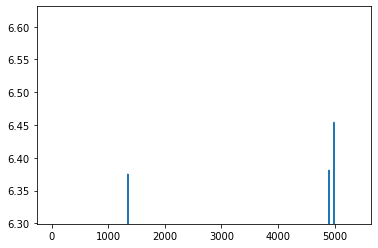


gagcccacttttataggggccggctgtggtcgccacaatgccggcaaacaagagttgtagcttgaagcgccccgcggggcgtggcaaggtggggagagaggtacagagagagagagagggggctgctagttgttgtcgtgcctgggttttttttttgtcttctattatattctgacttgcccacacatacccactaatggcgggcaaaaatgtgacgttagcggcgtgattaatacactgttgtgtggccatgggtgtgtggagacgattgatagtgtgtgtgtgcgtgctctggaggaggttgcactctatccgttccctcatacacctccaccatacccccgcaaaagaaagctgcaactttctaatgatcctccattggaacgaagccttttactcgcttaagaacaaattttgttacatttctttataatttctgattttaacaaacagataacaaagaagatacaatcctgccatacaggtattattaatcgtagggtatttacacatcgacttgctaagattagcaaacacataagcatgcaatcgattagcttgaaacacaattttgcatttctaatgaacatctgtgcgcctgaaaaaacataaattcttttaaaatgcaaaaaaaaataagtacaaacaaataagcaggcaaacagaaaccagataagaattcaagccggccggcaaacattgatatcaggcaaacatatatgtatgtatgtacatatgtacatatatagcaacagttgtcgagtatttccaacacacaagcaaatcgcgaaaggctcataccgtactaataagaccataaaaatataaccgtttttcgaattattcaatatactttgactcatagtaataattttaatgggtaagcccaagctatggtagacaaatagtagtagattaaatgatgagtcaaaggcacatgcaaattcgaaattactggtacacattttcaatgtaacaatatggatgggcttagtccat

In [8]:
## imports for formatting 
from termcolor import colored 
from colorama import Fore
from colorama import Style
from matplotlib import pyplot
import re
print(Fore.YELLOW + '\033[5m' + 'RESULTS' + '\n')
## goes through DNA sequences in data frame and analyzes each
bestscores = []
print('\n' + Fore.RED + '\033[5m')
## manually change 'intron' or 'gene' to the heading of the column in the spreadsheet that you want to look at
for i in range(len(dna_sequences.upstream)):
    ## accesses sequences from spreadsheet 
    DNA = dna_sequences.upstream[i].lower()
    gene = dna_sequences.gene[i]
    print('\n' + Fore.BLUE + '\033[5m' + 'Gene: ', gene)
    ## reads DNA sequence, creates scores for each
    def transcription_factor (seq, profile):
        width = len(profile['T'])
        bindingscore = []
        for i in range(len(seq)-width):
            score = 0
            for j in range(width):
                letter = seq[i+j]
                score += profile[letter][j]
            bindingscore.append (score)
        return bindingscore
    ## max binding score etc 
    upperseq = DNA.upper()
    bindingscores = transcription_factor(upperseq, profile)
    max_binding_list = []
    for i in range(len(profile['A'])):
        my_list = []
        my_list.append(profile['A'][i])
        my_list.append(profile['C'][i])
        my_list.append(profile['G'][i])
        my_list.append(profile['T'][i])
        max_binding_list.append(max(my_list))
    max_score = sum(max_binding_list)
    sites = []
    scores = []
    pairs = []
    ## presents binding site information 
    for i in range (len(bindingscores)):
        if bindingscores[i] > 0.95 * max_score: 
            sequence = DNA[i:i + len(profile['A'])]
            sites.append(sequence)
            pair = sequence.upper() + ': ' + str(bindingscores[i])
            pairs.append(str(pair))
            number = bindingscores[i]
            scores.append(number)
    ## attempting to scan newDNA to put in the revcomp transcription factor binding sites as well 
    revcompbindingscores = transcription_factor (upperseq, profilerevcomp)
    bindingscoresboth = bindingscores + revcompbindingscores
    pyplot.plot (bindingscoresboth)
    pyplot.ylim (0.95 * max_score, max_score)
    pyplot.show()
    for i in range (len(revcompbindingscores)):
        if revcompbindingscores[i] > 0.95 * max_score: 
            sequence = DNA[i:i + len(profile['A'])]
            sites.append(sequence)
            pair = sequence.upper() + ': ' + str(revcompbindingscores[i])
            pairs.append(str(pair))
            number = revcompbindingscores[i]
            scores.append(number)
    ## the function and loop below should accurately replace all revcomp binding sites with their capital counterpart
    newdict = {}
    for i in range (len(sites)):
        d1 = {str(i): sites[i].upper()}
        newdict.update(d1)
    def replace_all(text, dic):
        for i, j in zip(range (len(sites)), dic.values()):
            text = text.replace(sites[i], colored(str(j), 'green', attrs=['bold']))
            ## check more thoroughly that this works
        return text
    newDNA = replace_all(DNA, newdict)
    print('\n' + newDNA)
    ## presents binding scores for both original and revcomp 
    print('\n' + str(len(sites)) + ' binding scores' + '\n')
    print(pairs)
    sortedscores = sorted(scores, reverse = True)
    if len(sortedscores) > 0:
        bestscores.append(gene)
        highestscore = max(sortedscores)
        bestscores.append(highestscore)
print('\n' + Fore.BLUE + '\033[5m' + 'Highest Scores:' + Fore.RED + '\n')
print(bestscores)